In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stellar classification
## Context
_In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics._

Kaggle link: [https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)


## Load data

In [171]:
data = pd.read_csv("data/stars/star_classification.csv")

In [172]:
# pick random 10k rows for faster computation
data = data.sample(10000, random_state=42)

Add missing data for educational purposes.

In [173]:
missing_fraction = 0.1
features = data.drop(["class"], axis=1).columns
mask = np.random.rand(*data[features].shape) < missing_fraction
data[features] = data[features].mask(mask)

## Data exploration
Let's explore the data to see what we have. We will look at the data types, missing values, and the distribution of the target variable.

In [174]:
def pie_ratio(df, col):
    df[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(col)
    plt.show()

In [175]:
data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
75721,1.237679e+18,16.956890,3.646130,NaN,21.95143,20.48149,19.60300,19.13094,7712.0,301.0,6.0,442.0,4.855017e+18,GALAXY,0.506237,4312.0,55511.0,495.0
80184,1.237662e+18,240.063240,6.134131,17.86033,16.79228,16.43001,NaN,16.25873,3894.0,301.0,NaN,243.0,2.448928e+18,STAR,0.000345,2175.0,54612.0,348.0
19864,1.237679e+18,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,7717.0,301.0,1.0,536.0,8.255357e+18,STAR,0.000004,7332.0,56683.0,943.0
76699,1.237668e+18,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,5323.0,301.0,1.0,NaN,4.577999e+18,STAR,-0.000291,4066.0,55444.0,326.0
92991,1.237679e+18,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,7881.0,301.0,3.0,148.0,8.910472e+18,STAR,-0.000136,7914.0,57331.0,363.0
76434,NaN,182.713733,51.375805,NaN,21.68444,20.24292,19.41423,19.08227,2830.0,301.0,1.0,411.0,7.516726e+18,QSO,NaN,6676.0,56389.0,NaN
84004,1.237661e+18,150.089423,39.467088,18.96441,17.82906,17.31429,NaN,16.85583,3560.0,NaN,4.0,278.0,1.526796e+18,GALAXY,0.063664,1356.0,53033.0,274.0
80917,1.237655e+18,189.510984,58.741120,21.37376,20.80187,20.84925,21.13449,NaN,2243.0,301.0,1.0,353.0,7.696818e+18,QSO,0.793615,6836.0,NaN,604.0
60767,1.237657e+18,NaN,-0.525138,20.77988,NaN,19.16687,18.89438,NaN,2700.0,301.0,NaN,117.0,1.755328e+18,GALAXY,NaN,1559.0,53271.0,NaN
50074,1.237665e+18,201.074980,28.769906,25.05349,22.23362,20.81220,19.69488,19.28336,4649.0,NaN,3.0,120.0,7.306035e+18,GALAXY,0.567082,6489.0,56329.0,257.0


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 75721 to 74479
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       8993 non-null   float64
 1   alpha        9002 non-null   float64
 2   delta        9058 non-null   float64
 3   u            8969 non-null   float64
 4   g            8946 non-null   float64
 5   r            8982 non-null   float64
 6   i            9017 non-null   float64
 7   z            8963 non-null   float64
 8   run_ID       8980 non-null   float64
 9   rerun_ID     9004 non-null   float64
 10  cam_col      9024 non-null   float64
 11  field_ID     8997 non-null   float64
 12  spec_obj_ID  8988 non-null   float64
 13  class        10000 non-null  object 
 14  redshift     8969 non-null   float64
 15  plate        9011 non-null   float64
 16  MJD          8947 non-null   float64
 17  fiber_ID     9006 non-null   float64
dtypes: float64(17), object(1)
memory usage: 1.

There are 18 columns, 17 features and 1 target variable (class). The target variable is categorical, the rest are numerical.

In [177]:
missing = data.isnull().sum()
missing_percent = missing / data.shape[0] * 100
pd.DataFrame({"missing": missing, "missing_percent": missing_percent}).sort_values(by="missing", ascending=False)

,missing,missing_percent
g,1054,10.54
MJD,1053,10.53
z,1037,10.37
u,1031,10.31
redshift,1031,10.31
run_ID,1020,10.20
r,1018,10.18
spec_obj_ID,1012,10.12
obj_ID,1007,10.07
field_ID,1003,10.03


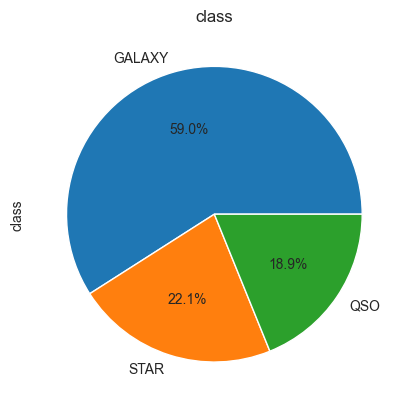

GALAXY    5904
STAR      2209
QSO       1887
Name: class, dtype: int64

In [178]:
pie_ratio(data, "class")
data["class"].value_counts()

Data is unbalanced, there are more galaxies than stars and quasars. Let's change the target variable to numerical for easier analysis.

## Feature selection

Available features:
* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [179]:
def plot(column, df):
    for i in df["class"].unique():
        sns.kdeplot(
            data=df[df["class"] == i][column],
            label=i,
            warn_singular=False
        )
    plt.legend()

def plot_log(column, df):
    for i in df["class"].unique():
        sns.kdeplot(
            data=np.log(df[df["class"] == i][column]),
            label=i,
            warn_singular=False
        )
    plt.legend()

Drop columns that are not useful for classification.

In [180]:
data.drop(["obj_ID", "run_ID"], axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


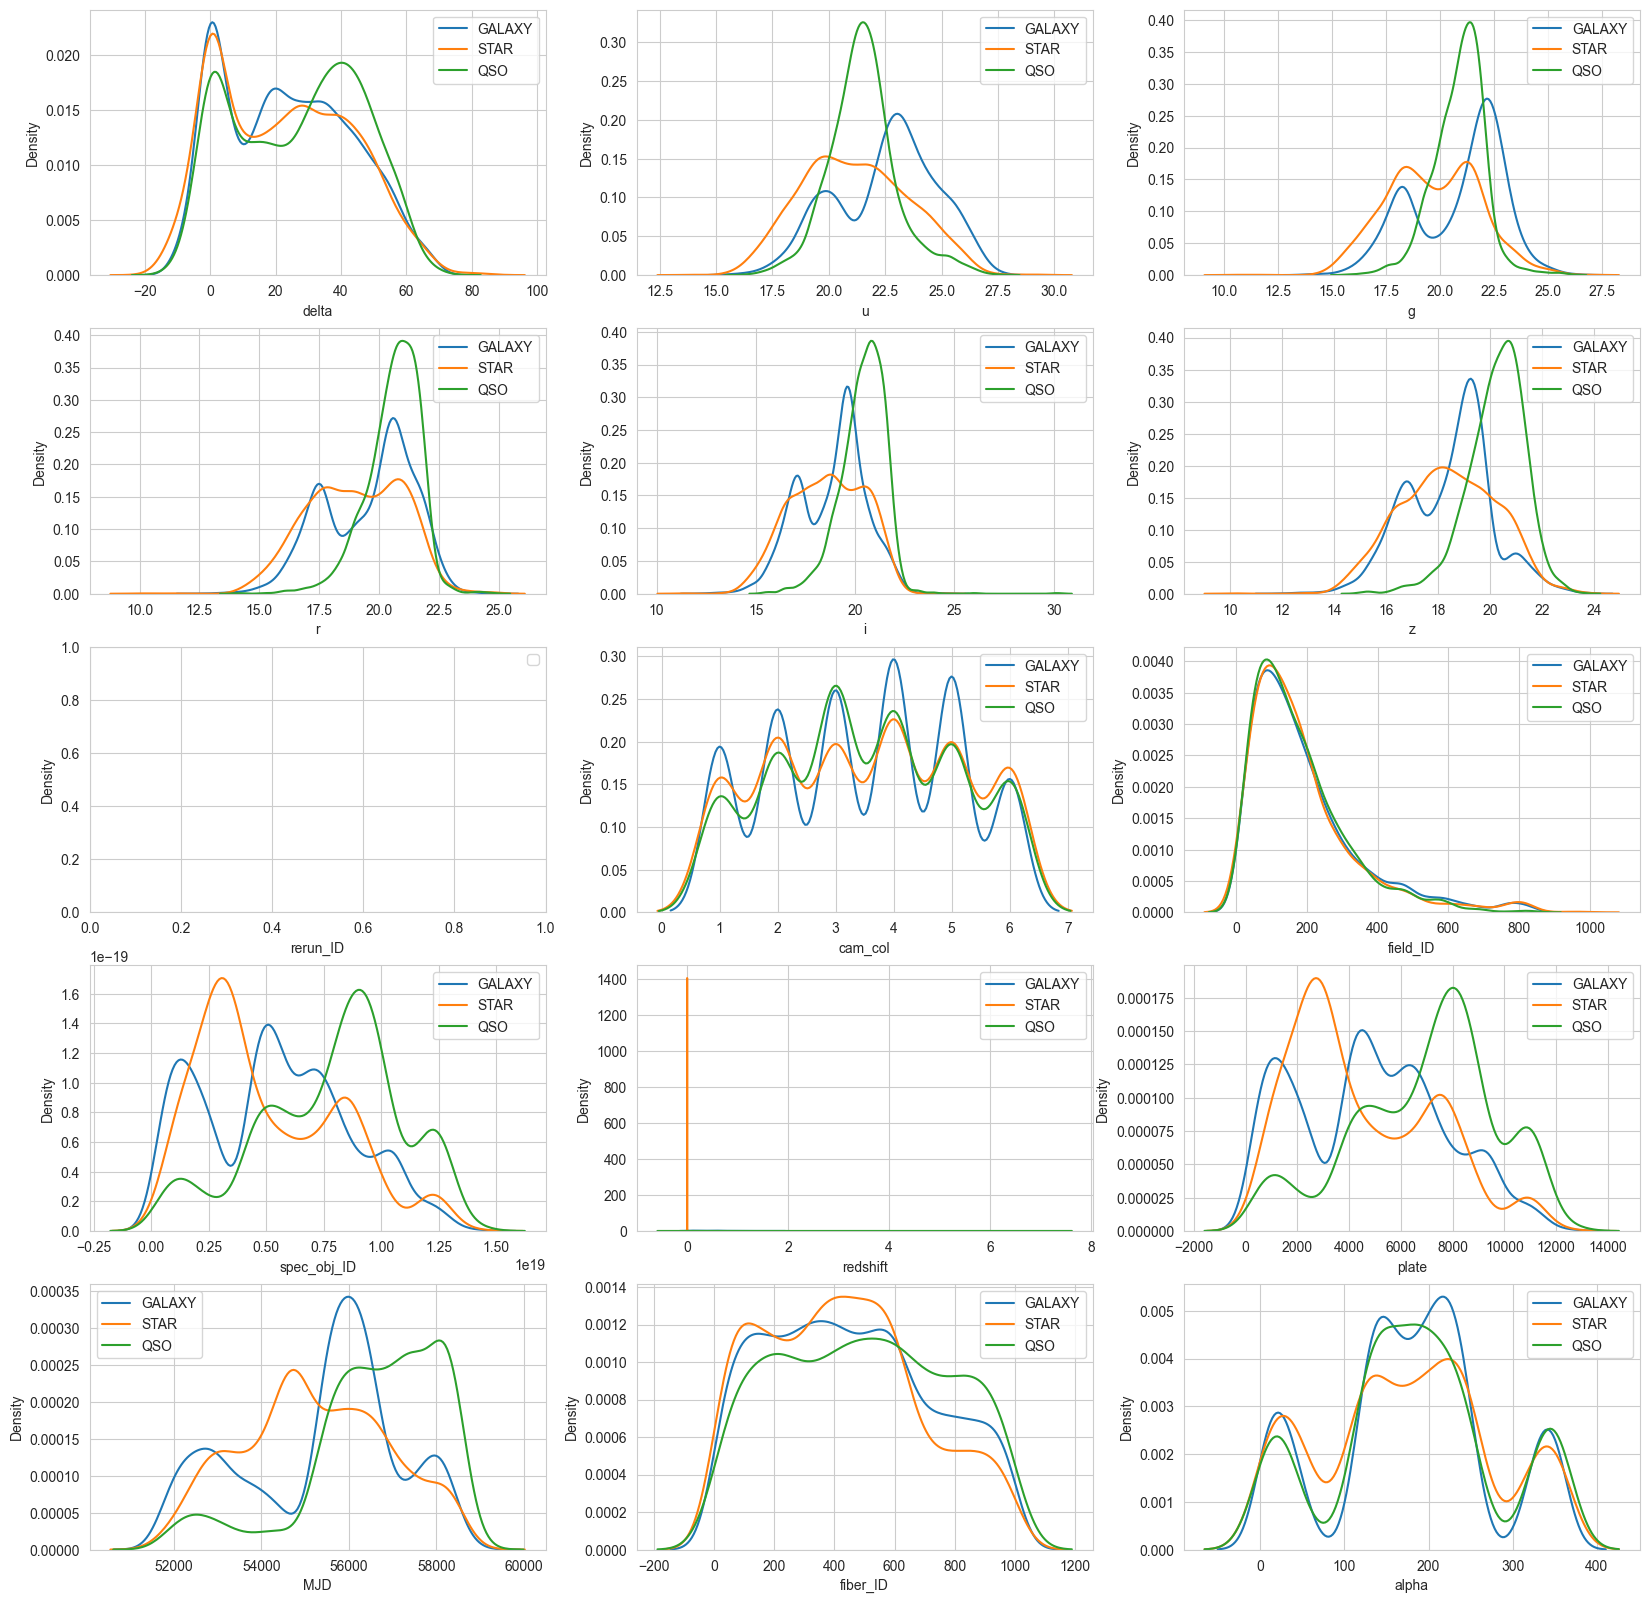

In [181]:
ax, fig = plt.subplots(5, 3, figsize=(20, 20))
for i, column in enumerate(data.drop(["class"], axis=1).columns):
    plot(column, data)
    plt.subplot(5, 3, i + 1)

There is no significant difference in the distribution for cam_col, field_ID, rerun_ID features. Let's drop them.

In [182]:
data.drop(["cam_col", "field_ID", "rerun_ID"], axis=1, inplace=True)

Some features have a very high skewness, so plot them with log scale. In preprocessing we will apply log transformation to these features.

P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


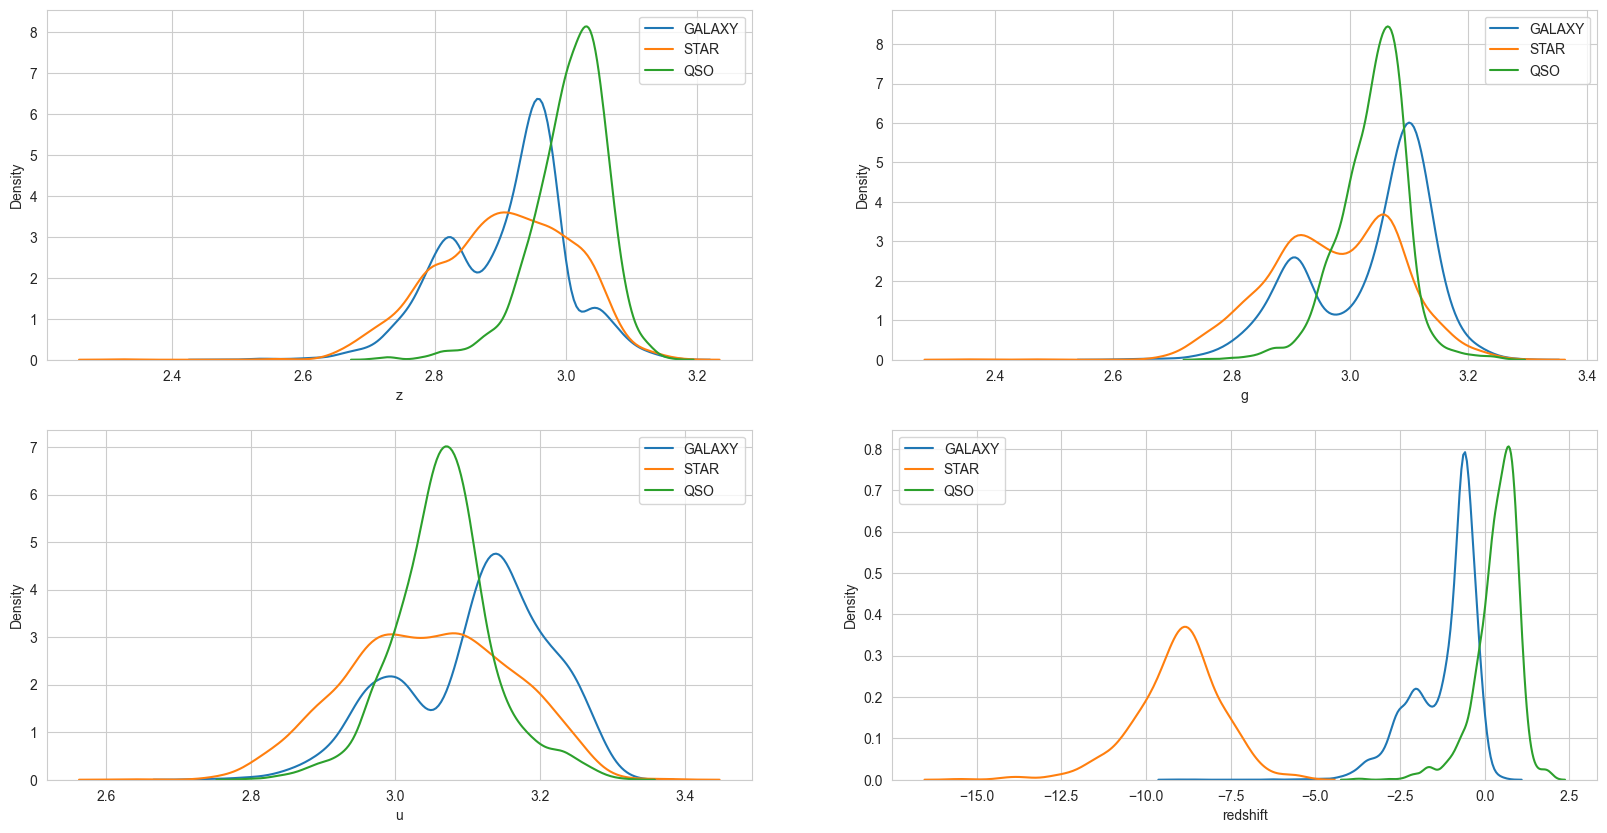

In [183]:
ax, fig = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(["redshift", "z", "g", "u"]):
    plot_log(column, data)
    plt.subplot(2, 2, i + 1)

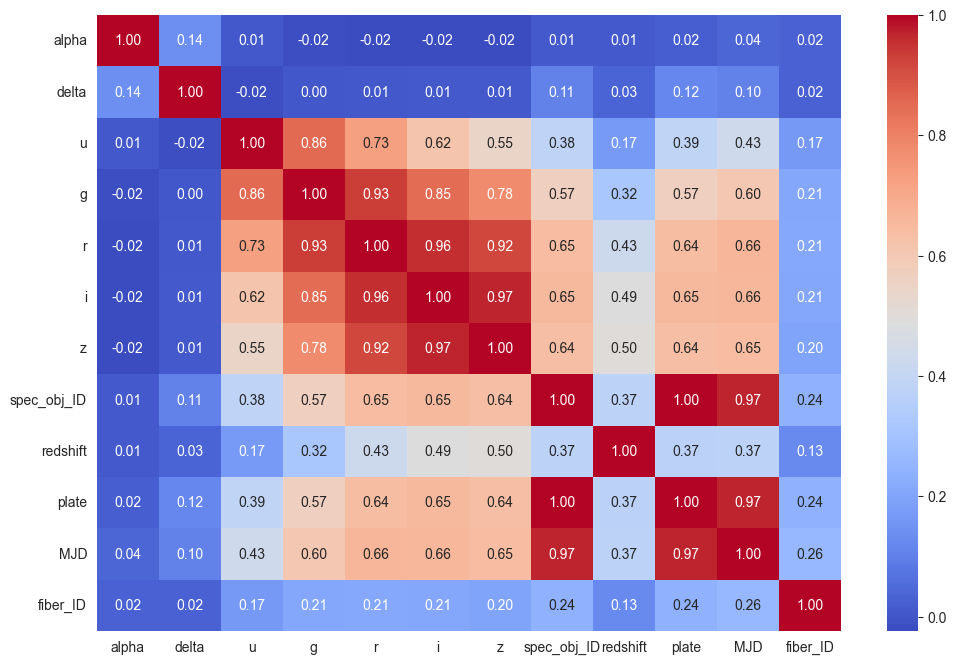

In [184]:
corr = data.drop(["class"], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Remove highly correlated features.

In [185]:
corr = corr.abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)
print("Removed features:", to_drop)

Removed features: ['i', 'z', 'plate', 'MJD']


## Preprocessing pipeline
* Fill missing values using KNN
* Log transformation for skewed features
* Standardization
* Encode target variable
* Class balancing using SMOTE

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

In [187]:
# to shift negative values and apply log transformation
def log_transform_with_neg(x):
    constant = abs(np.min(x)) + 1
    return np.log1p(x + constant)

In [188]:
skewed_features = ["redshift", "g", "u"]
other_features = data.drop(["class", *skewed_features], axis=1).columns

preprocessing = ColumnTransformer(
    [
        ("skewed_features", Pipeline([
            ("imputer", KNNImputer()),
            ("log_transform", FunctionTransformer(log_transform_with_neg)),
            ("scaler", StandardScaler())
        ]), skewed_features),
        ("other_features", Pipeline([
            ("imputer", KNNImputer()),
            ("scaler", StandardScaler())
        ]), other_features)
    ]
)

Label encoder and sampling doesn't work very well with pipelines, so we have to do it manually

In [189]:
label_encoder = LabelEncoder()
data["class"] = label_encoder.fit_transform(data["class"])
X, Y = RandomUnderSampler().fit_resample(data.drop(["class"], axis=1), data["class"])

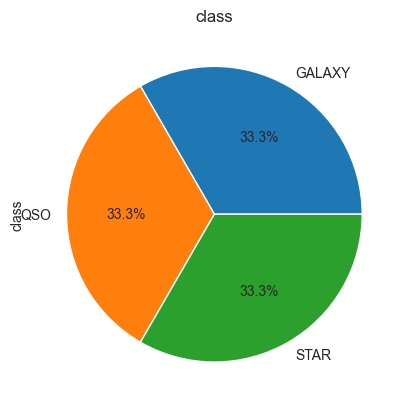

In [190]:
# class distribution after sampling
pie_ratio(pd.DataFrame(label_encoder.inverse_transform(Y), columns=["class"]), "class")

## Train standard models with grid search
1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbors (KNN)
4. Support Vector Machine (SVM)
5. XGBoost

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [192]:
def get_pipeline(model):
    return Pipeline([
        ("preprocessing", preprocessing),
        ("model", model)
    ])

def save_metrics(model_name, y_pred, y_test):
    r2 = r2_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    macro_avg = report["macro avg"]
    models[model_name] = {
        "r2": r2,
        "accuracy": report["accuracy"],
        "precision": macro_avg["precision"],
        "recall": macro_avg["recall"],
        "f1-score": macro_avg["f1-score"]
    }

In [193]:
# model metrics container
models = {}

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# 5-fold cross validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 1. Logistic Regression

In [194]:
lr = get_pipeline(LogisticRegression(multi_class="multinomial"))
lr_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
}
lr_cv = GridSearchCV(lr, lr_grid, cv=k_fold, n_jobs=-1)
lr_cv.fit(X_train, y_train)
y_pred = lr_cv.predict(X_test)

save_metrics("Logistic Regression", y_pred, y_test)
print(lr_cv.best_params_)
print(classification_report(y_test, lr_cv.predict(X_test), zero_division=1))

{'model__C': 100}
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       377
           1       0.90      0.87      0.88       378
           2       0.82      0.90      0.86       378

    accuracy                           0.84      1133
   macro avg       0.84      0.84      0.84      1133
weighted avg       0.84      0.84      0.84      1133



### 2. Random Forest

In [195]:
rf = get_pipeline(RandomForestClassifier())
rf_grid = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [5, 10]
}
rf_cv = GridSearchCV(rf, rf_grid, cv=k_fold, n_jobs=-1)
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_test)

save_metrics("Random Forest", y_pred, y_test)
print(rf_cv.best_params_)
print(classification_report(y_test, rf_cv.predict(X_test), zero_division=1))

{'model__max_depth': 10, 'model__n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       377
           1       0.89      0.93      0.91       378
           2       0.99      0.90      0.94       378

    accuracy                           0.91      1133
   macro avg       0.92      0.91      0.91      1133
weighted avg       0.92      0.91      0.91      1133



### 3. K-Nearest Neighbors (KNN)

In [196]:
knn = get_pipeline(KNeighborsClassifier())
knn_grid = {
    "model__n_neighbors": [3, 5, 7, 9],
}
knn_cv = GridSearchCV(knn, knn_grid, cv=k_fold, n_jobs=-1)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

save_metrics("KNN", y_pred, y_test)
print(knn_cv.best_params_)
print(classification_report(y_test, knn_cv.predict(X_test), zero_division=1))

{'model__n_neighbors': 7}
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       377
           1       0.92      0.87      0.89       378
           2       0.83      0.78      0.80       378

    accuracy                           0.82      1133
   macro avg       0.83      0.82      0.83      1133
weighted avg       0.83      0.82      0.83      1133



### 4. Support Vector Machine (SVM)

In [197]:
svm = get_pipeline(SVC())
svm_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__kernel": ["linear", "poly", "rbf", "sigmoid"],
}
svm_cv = GridSearchCV(svm, svm_grid, cv=k_fold, n_jobs=-1)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)

save_metrics("SVM", y_pred, y_test)
print(svm_cv.best_params_)
print(classification_report(y_test, svm_cv.predict(X_test), zero_division=1))

{'model__C': 10, 'model__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       377
           1       0.91      0.89      0.90       378
           2       0.93      0.88      0.90       378

    accuracy                           0.89      1133
   macro avg       0.89      0.89      0.89      1133
weighted avg       0.89      0.89      0.89      1133



### 5. XGBoost

In [198]:
xgb = get_pipeline(XGBClassifier())
xgb_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [5, 10],
    "model__learning_rate": [0.01, 0.1, 1]
}
xgb_cv = GridSearchCV(xgb, xgb_grid, cv=k_fold, n_jobs=-1)
xgb_cv.fit(X_train, y_train)
y_pred = xgb_cv.predict(X_test)

save_metrics("XGBoost", y_pred, y_test)
print(xgb_cv.best_params_)
print(classification_report(y_test, xgb_cv.predict(X_test), zero_division=1))

{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       377
           1       0.88      0.92      0.90       378
           2       0.97      0.90      0.94       378

    accuracy                           0.91      1133
   macro avg       0.91      0.91      0.91      1133
weighted avg       0.91      0.91      0.91      1133



## Neural Network Models
6. Multi-layer Perceptron (MLP)
7. Convolutional Neural Network (CNN)

In [199]:
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [200]:
def get_mlp(input_shape, num_classes):
    model = Sequential([
        tfl.Dense(128, activation="relu", input_shape=input_shape),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Dense(256, activation="relu"),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Dense(512, activation="relu"),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Dense(256, activation="relu"),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Dense(128, activation="relu"),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


def get_cnn(input_shape, num_classes):
    model = Sequential([
        tfl.Reshape((input_shape[0], 1), input_shape=input_shape),
        tfl.Conv1D(filters=32, kernel_size=3, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Conv1D(filters=64, kernel_size=3, activation='relu'),
        tfl.MaxPooling1D(pool_size=2),
        tfl.Flatten(),
        tfl.Dense(128, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.5),
        tfl.Dense(64, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.3),
        tfl.Dense(32, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.1),
        tfl.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [201]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
)

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

### 6. Multi-layer Perceptron (MLP)

In [204]:
mlp_model = get_mlp(X_train.shape[1:], 3)
mlp_model.summary()

mlp_history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               1152      
                                                                 
 batch_normalization_108 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dropout_108 (Dropout)       (None, 128)               0         
                                                                 
 dense_121 (Dense)           (None, 256)               33024     
                                                                 
 batch_normalization_109 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                                 
 dropout_109 (Dropout)       (None, 256)             

36/36 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       377
           1       0.92      0.91      0.92       378
           2       0.93      0.91      0.92       378

    accuracy                           0.91      1133
   macro avg       0.91      0.91      0.91      1133
weighted avg       0.91      0.91      0.91      1133



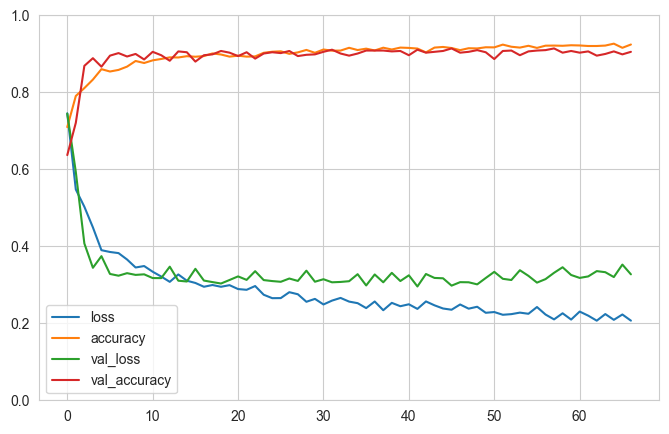

In [205]:
y_pred = mlp_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred, axis=1)

save_metrics("MLP", y_pred, y_test)
print(classification_report(y_test, y_pred, zero_division=1))

pd.DataFrame(mlp_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 7. Convolutional Neural Network (CNN)

In [206]:
# one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [207]:
cnn_model = get_cnn(X_train.shape[1:], 3)
cnn_model.summary()

cnn_history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 8, 1)              0         
                                                                 
 conv1d_25 (Conv1D)          (None, 6, 32)             128       
                                                                 
 batch_normalization_113 (Ba  (None, 6, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_113 (Dropout)       (None, 6, 32)             0         
                                                                 
 conv1d_26 (Conv1D)          (None, 4, 64)             6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 2, 64)            0         
 g1D)                                                

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       377
           1       0.91      0.92      0.91       378
           2       0.93      0.90      0.91       378

    accuracy                           0.90      1133
   macro avg       0.90      0.90      0.90      1133
weighted avg       0.90      0.90      0.90      1133



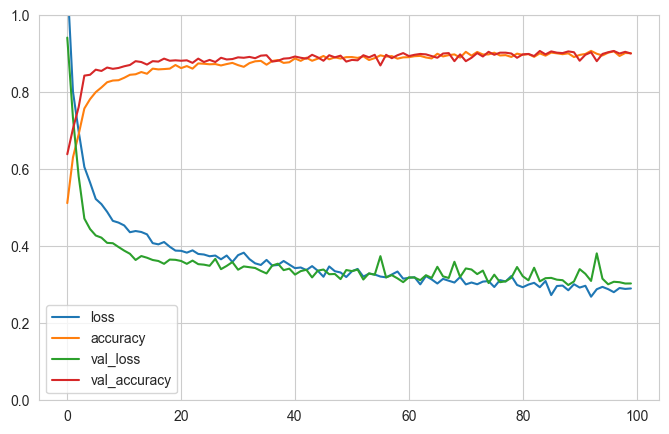

In [208]:
y_pred = cnn_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred, axis=1)

save_metrics("CNN", y_pred, y_test)
print(classification_report(y_test, y_pred, zero_division=1))

pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model comparison

In [209]:
df = pd.DataFrame(models).T
df = df[["accuracy", "r2", "precision", "recall", "f1-score"]]
df

,accuracy,r2,precision,recall,f1-score
Logistic Regression,0.842012,0.397350,0.842274,0.841932,0.841080
Random Forest,0.914387,0.772185,0.917642,0.914392,0.914966
KNN,0.824360,0.255628,0.830493,0.824368,0.825759
SVM,0.890556,0.637086,0.892103,0.890559,0.890899
XGBoost,0.911739,0.776159,0.913950,0.911744,0.912184
MLP,0.909974,0.709933,0.910352,0.909969,0.910078
CNN,0.899382,0.666225,0.899840,0.899370,0.899486
